## Introduction

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?      
Data contains 110,527 medical appointments with its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Let's figure out what are the characterstics that are causing more no show percentages.


## Posing questions

    1. Does Age matters?
    2. What is the difference between No-show percentages with and without influence of each binary variable in the data?    
    3. Is there any difference in no show percentages between gender when they are under the influence of alcohol?    
    4. What are the top neighbourhoods in no show percentages?
    5. Does day of week and days gap have any effect on no show percentages?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing values in our data. But some variables data types are not appropriate so we need to choose a suitable      data type for those variable and convert.

In [5]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

converting no show variable to numerical from object to perform calculations easily.

In [6]:
#convert No-show to numerical
df['No-show_int'] = df['No-show'].apply(lambda x : 1 if x == 'Yes' else 0) 

Converting ScheduledDay, AppointmentDay to datetime from objects to extract the infromation from dates such as days, hours..etc

In [7]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Creating new variables from datetime variables for more analysis

In [8]:
# number of days gap between doctor appointment and the day when the appointment is scheduled
df['days_gap'] = [i.days if i.days >= 0 else 0 for i in df['AppointmentDay'] - df['ScheduledDay'] ]

#day of the week of doctor's appointment
df['Appointment_weekday'] = [i.strftime('%a') for i in df['AppointmentDay']]

#day of the week of when the appointemnt is scheduled
df['Scheduled_weekday'] = [i.strftime('%a') for i in df['ScheduledDay']]

## Exploratory Data Analysis

### Does Age matters?

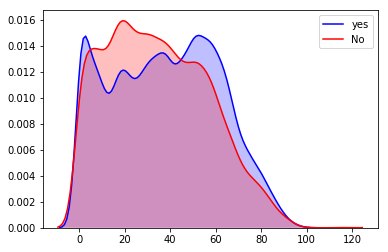

In [10]:
sb.kdeplot(df[df['No-show'] == 'No']['Age'], color = 'b', shade = True, label = 'yes')
sb.kdeplot(df[df['No-show'] == 'Yes']['Age'], color = 'r', shade = True, label = 'No')

The Distribution of age is same for both No-show cases so age does not seems to have a effect on No-show

### What is the difference between No-show percentages with and without influence of each binary variable

In [11]:
#create a dataframe for plotting all binary variables no-show percentage.
binary_variables = ['Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
cat_names = []
noshow_perc = []

for var in binary_variables:
    noshow_perc.append((df[df[var]  == 1]['No-show_int'].mean() - df[df[var]  == 0]['No-show_int'].mean()) * 100)
    cat_names.append(var)
    
df_binary_viz = pd.DataFrame({'Categories' : cat_names, 'No show percentages difference' : noshow_perc})
df_binary_viz.head()

,Categories,No show percentages difference
0,Scholarship,3.929148
1,Hipertension,-3.601722
2,Diabetes,-2.359551
3,Alcoholism,-0.045840
4,Handcap,-2.311698


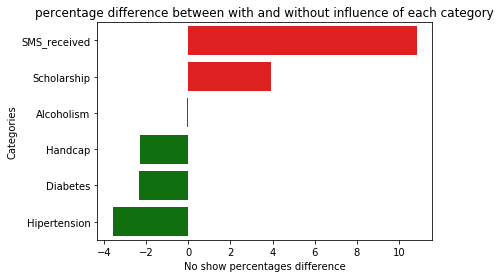

In [12]:
order = ['SMS_received','Scholarship','Alcoholism',
       'Handcap','Diabetes','Hipertension']
palette = ['red'] * 2 + ['green'] * 4
sb.barplot(data = df_binary_viz, y = 'Categories', x = 'No show percentages difference', order = order, palette=palette)
plt.title('percentage difference between with and without influence of each category');

In the above graph, red colour bar shows the variables which have high no show appointments than the shown up appointments where as green colour bar shows the opposite. SMS_received and scholarship have more no shows percentage difference.

In [13]:
df.groupby('Gender')['No-show_int'].mean()

Gender
F    0.203146
M    0.199679
Name: No-show_int, dtype: float64

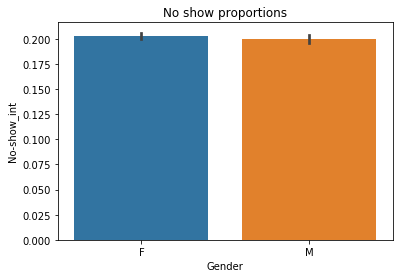

In [14]:
sb.barplot(df['Gender'], y = df['No-show_int']) #show percentages
plt.title('No show proportions');

Both males and females have almost equal no show proportions.

### is there any difference in no show percentages between gender when they are under the influence of alcohol?

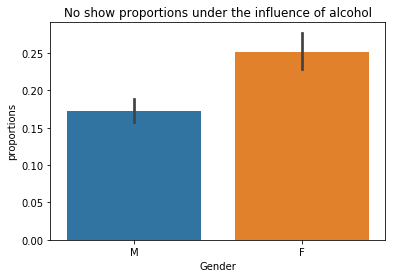

In [15]:
#create interaction terms with gender like gender and alcoholism.....
sb.barplot(data = df[df['Alcoholism'] == 1], x = 'Gender', y = 'No-show_int')
plt.xlabel('Gender')
plt.ylabel('proportions')
plt.title('No show proportions under the influence of alcohol');

Females with alcohol have a higher no show percentages than males with alcohol

### What are the top neighbourhoods in no show percentages ?

In [16]:
#creating a df with each neighbourhood no show percentages and total number of appointments 
df_neighbourhood_viz = df.groupby('Neighbourhood')['No-show_int'].agg(['mean','count']).reset_index()
df_neighbourhood_viz = df_neighbourhood_viz.sort_values(by = 'mean', ascending = False)

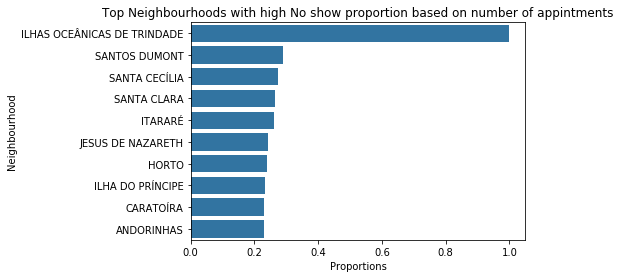

In [17]:
def plot_neighbouhood(top = 10,min_appointments = 0):
    """
    plots bar chart of no show percentages of neighbourhoods based on the filters
    
    Attributes:
        top(int) : top neighbourhoods in no show percentages
        min_appointments(int) : minimum number of appointments to be considered 
        
    Returns:
        None
    """
    sb.barplot(data = df_neighbourhood_viz[df_neighbourhood_viz['count'] > min_appointments][:top], y = 'Neighbourhood',x = 'mean',color = sb.color_palette()[0])
    plt.xlabel('Proportions')
    plt.title('Top Neighbourhoods with high No show proportion based on number of appintments');
    
plot_neighbouhood()

ILHAS OCEANICAS DE TRINADE has highest no show proportion than any other neighbourhoods. But this can be misleading if the appointments in that neighbourhood is very less when compared to other neighbourhoods. So we need to filter these results by setting the minimum number of appointments.

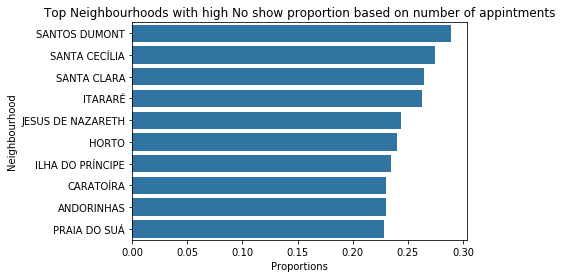

In [29]:
plot_neighbouhood(10,100) #neighbourhoods atleast with minimum of 100 appointments.

After filtering based on the minimum number of appointments, ILHAS OCEANICAS DE TRINADE neighbourhood is not in our list 

### Does day of week and days gap have any effect on no show percentages?

In [18]:
df['days_gap'].describe()

count    110527.000000
mean          9.532739
std          15.027729
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: days_gap, dtype: float64

In [23]:
df['days_gap'].value_counts().head()

0    43781
1     6725
3     5290
6     4906
5     4037
Name: days_gap, dtype: int64

43,781 appointments were made on the same day of doctor's appointment. What is the no show percentage when this is the case?

In [25]:
df[df['days_gap'] == 0]['No-show_int'].mean() * 100

6.64671889632489

Only 6% of appointments made on the same day of doctor's appointment have not showed up. what is the no show percentage regardless of which day it has booked?

In [27]:
df['No-show_int'].mean() * 100

20.193255946510806

In general, 20% of appointments have not showed up it is very high compared to appointment made on the same day as doctor's appointment

In [134]:
df['Appointment_weekday'].value_counts()

Wed    25867
Tue    25640
Mon    22715
Fri    19019
Thu    17247
Sat       39
Name: Appointment_weekday, dtype: int64

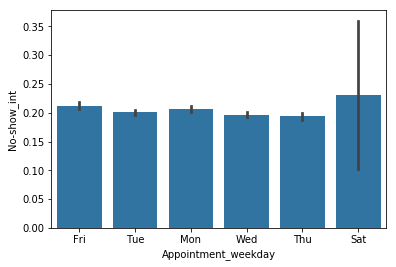

In [132]:
sb.barplot(data = df, x = 'Appointment_weekday', y = 'No-show_int', color = sb.color_palette()[0])

In [136]:
df['Scheduled_weekday'].value_counts()

Tue    26168
Wed    24262
Mon    23085
Fri    18915
Thu    18073
Sat       24
Name: Scheduled_weekday, dtype: int64

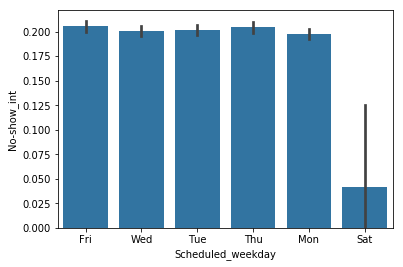

In [133]:
sb.barplot(data = df, x = 'Scheduled_weekday', y = 'No-show_int', color = sb.color_palette()[0])

all days have almost equal no show proportions except on saturday. but we can not say this for sure because the appointments on saturday is very less so its confindence interval range is also very high 

## Conclusion

### Summary :
    1. SMS_received and scholarship have more no shows percentage difference.
    2. Females with alcohol have a higher no show percentages than males with alcohol.
    3. Only 6% of appointments made on the same day of doctor's appointment have not showed up which is less compared to  
       overall no show percentage which is 20%.
    4. all days have almost equal no show proportions except on saturday. 
    
### Limitations :
    1. We can not provide proper conclusion on no show percentages for few neighbourhoods because the data of appointments
       made in those neighbourhoods are very less.
    2. We can not give good statistical conclusions on no show percentages of saturday because the data of appointments made
       on saturday is very less.